<a href="https://colab.research.google.com/github/dbillion/python-and-sql-practise/blob/master/ngrokTEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install 'sqlglot<=20.11,>=18.12.0'
!pip install pygwalker -q


  Using cached sqlglot-20.11.0-py3-none-any.whl (356 kB)
  Attempting uninstall: sqlglot
    Found existing installation: sqlglot 25.0.3
    Uninstalling sqlglot-25.0.3:
      Successfully uninstalled sqlglot-25.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pygwalker 0.4.8.9 requires sqlglot>=23.15.8, but you have sqlglot 20.11.0 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.8.0 requires sqlglot<=20.11,>=20.8.0, but you have sqlglot 25.0.3 which is incompatible.
ibis-framework 8.0.0 requires sqlglot<=20.11,>=18.12.0, but you have sqlglot 25.0.3 which is incompatible.


In [30]:
import pygwalker as pyg
import pandas as pd

df = pd.read_csv("/content/sample_data/customerdatabase.csv")
df

,Order Created Time,Order ID,Restaurant ID,Title,Currency,Quantity,Unit Price (with VAT),Total (without VAT),Total (with VAT),Bolt Service Fee,Unit Price (Without VAT)
0,2021-12-22 12:51:05,ZZW,18269,ProductBottle,eur,1,2.49,11.33,13.58,1.13,2.08
1,2021-12-22 12:51:05,ZZW,18269,ProductBottle,eur,1,10.99,11.33,13.58,1.13,9.16
2,2021-12-22 12:51:05,ZZW,18269,Deposit,eur,1,0.10,11.33,13.58,1.13,0.10
3,2021-12-26 15:27:27,ZY4,18256,ProductBottle,eur,1,35.99,29.99,35.99,3.02,29.99
4,2021-12-28 20:05:00,ZY0,18256,ProductBottle,eur,1,8.19,6.83,8.19,0.68,6.82
...,...,...,...,...,...,...,...,...,...,...,...
2559,2022-01-01 15:35:50,01W,18265,ProductBottle,eur,2,4.35,15.64,18.75,1.56,3.62
2560,2022-01-01 15:35:50,01W,18265,Deposit,eur,1,0.10,15.64,18.75,1.56,0.10
2561,2021-12-29 18:39:14,00O,18256,ProductBottle,eur,4,1.49,37.84,45.33,3.77,1.24
2562,2021-12-29 18:39:14,00O,18256,ProductBottle,eur,3,12.99,37.84,45.33,3.77,10.83


from matplotlib import pyplot as plt
df['Restaurant ID'].plot(kind='hist', bins=20, title='Restaurant ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Quantity'].plot(kind='hist', bins=20, title='Quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Unit Price (with VAT)'].plot(kind='hist', bins=20, title='Unit Price (with VAT)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Total (without VAT)'].plot(kind='hist', bins=20, title='Total (without VAT)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Restaurant ID', y='Quantity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Quantity', y='Unit Price (with VAT)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Unit Price (with VAT)', y='Total (without VAT)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Total (without VAT)', y='Total (with VAT)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Order Created Time']
  ys = series['Restaurant ID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Order Created Time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Title')):
  _plot_series(series, series_name, i)
  fig.legend(title='Title', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Order Created Time')
_ = plt.ylabel('Restaurant ID')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Order Created Time']
  ys = series['Quantity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Order Created Time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Title')):
  _plot_series(series, series_name, i)
  fig.legend(title='Title', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Order Created Time')
_ = plt.ylabel('Quantity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Order Created Time']
  ys = series['Unit Price (with VAT)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Order Created Time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Title')):
  _plot_series(series, series_name, i)
  fig.legend(title='Title', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Order Created Time')
_ = plt.ylabel('Unit Price (with VAT)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Order Created Time']
  ys = series['Total (without VAT)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Order Created Time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Title')):
  _plot_series(series, series_name, i)
  fig.legend(title='Title', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Order Created Time')
_ = plt.ylabel('Total (without VAT)')

from matplotlib import pyplot as plt
df['Restaurant ID'].plot(kind='line', figsize=(8, 4), title='Restaurant ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Quantity'].plot(kind='line', figsize=(8, 4), title='Quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Unit Price (with VAT)'].plot(kind='line', figsize=(8, 4), title='Unit Price (with VAT)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Total (without VAT)'].plot(kind='line', figsize=(8, 4), title='Total (without VAT)')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Restaurant ID', y='Title', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Quantity', y='Title', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Unit Price (with VAT)', y='Title', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Total (without VAT)', y='Title', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (replace '[your_data_file\.csv]' with the actual file path)
df = pd.read_csv("/content/sample_data/customerdatabase.csv", low_memory=False)


In [43]:
print(df.head())
print(df.tail())


    Order Created Time Order ID  Restaurant ID          Title Currency  \
0  2021-12-22 12:51:05      ZZW          18269  ProductBottle      eur   
1  2021-12-22 12:51:05      ZZW          18269  ProductBottle      eur   
2  2021-12-22 12:51:05      ZZW          18269        Deposit      eur   
3  2021-12-26 15:27:27      ZY4          18256  ProductBottle      eur   
4  2021-12-28 20:05:00      ZY0          18256  ProductBottle      eur   

   Quantity  Unit Price (with VAT)  Total (without VAT)  Total (with VAT)  \
0         1                   2.49                11.33             13.58   
1         1                  10.99                11.33             13.58   
2         1                   0.10                11.33             13.58   
3         1                  35.99                29.99             35.99   
4         1                   8.19                 6.83              8.19   

   Bolt Service Fee  Unit Price (Without VAT)  
0              1.13                      2.0

In [44]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")


Number of rows: 2564
Number of columns: 11


In [45]:
print(df.dtypes)


Order Created Time           object
Order ID                     object
Restaurant ID                 int64
Title                        object
Currency                     object
Quantity                      int64
Unit Price (with VAT)       float64
Total (without VAT)         float64
Total (with VAT)            float64
Bolt Service Fee            float64
Unit Price (Without VAT)    float64
dtype: object


In [46]:
print(df.isnull().sum())  # Check for missing values
df.dropna(inplace=True)   # Remove rows with missing values (if needed)


Order Created Time          0
Order ID                    0
Restaurant ID               0
Title                       0
Currency                    0
Quantity                    0
Unit Price (with VAT)       0
Total (without VAT)         0
Total (with VAT)            0
Bolt Service Fee            0
Unit Price (Without VAT)    0
dtype: int64


In [47]:
print(df.describe())


       Restaurant ID     Quantity  Unit Price (with VAT)  Total (without VAT)  \
count    2564.000000  2564.000000            2564.000000          2564.000000   
mean    19211.559672     2.602964               6.979029            25.133725   
std      1665.353321     3.146682               8.397329            21.890970   
min     18250.000000     1.000000               0.100000             1.350000   
25%     18256.000000     1.000000               1.200000            10.490000   
50%     18270.000000     1.000000               4.350000            18.010000   
75%     19984.000000     3.000000               9.990000            30.767500   
max     34221.000000    40.000000              59.990000           161.280000   

       Total (with VAT)  Bolt Service Fee  Unit Price (Without VAT)  
count       2564.000000       2564.000000               2564.000000  
mean          30.098842          2.383155                  5.820850  
std           26.266043          2.154915                  6

In [59]:
# Assuming you have loaded the data into a DataFrame called 'df'
# Calculate revenue for each order
df['Revenue'] = df['Unit Price (with VAT)'] * df['Quantity']

# Group by Restaurant ID and aggregate revenue and volume
restaurant_summary = df.groupby('Restaurant ID').agg({
    'Revenue': 'sum',
    'Quantity': 'sum'
}).reset_index()


restaurant_summary

,Restaurant ID,Revenue,Quantity
0,18250,960.65,224
1,18256,9961.84,1834
2,18265,4249.31,1106
3,18269,323.24,64
4,18270,2158.73,386
5,19981,1910.47,339
6,19982,458.03,57
7,19983,3360.67,1105
8,19984,4288.91,1120
9,19985,1967.73,394


In [83]:
# Calculate a performance metric (e\.g\., revenue, volume, or a combination)
# For example, you can use total revenue as the performance metric:
restaurant_summary['Performance'] = restaurant_summary['Revenue']

# Sort by performance (descending) to find the top-performing restaurant
top_restaurant = restaurant_summary.sort_values(by='Performance', ascending=False).iloc[0:]

top_restaurant

,Restaurant ID,Revenue,Quantity,Performance
1,18256,9961.84,1834,9961.84
8,19984,4288.91,1120,4288.91
2,18265,4249.31,1106,4249.31
7,19983,3360.67,1105,3360.67
4,18270,2158.73,386,2158.73
9,19985,1967.73,394,1967.73
5,19981,1910.47,339,1910.47
0,18250,960.65,224,960.65
6,19982,458.03,57,458.03
10,34221,326.51,45,326.51


In [88]:
# Extract relevant information
top_restaurant_id = top_restaurant['Restaurant ID']
top_revenue = top_restaurant['Revenue']
top_volume = top_restaurant['Quantity']

# print(f"Top 10  Performing Restaurant by ID: \n {top_restaurant}")
print(f"Top 5  Performing Restaurant by ID: \n {top_restaurant.head(5)}")
print(f"Top 3  least performing Restaurant by ID: \n {top_restaurant.tail(3)}")
print(f"Total Revenue: ${top_revenue.sum(): .2f}")
print(f"Total Volume Delivered: {top_volume.sum()} units")

Top 5  Performing Restaurant by ID: 
    Restaurant ID  Revenue  Quantity  Performance
1          18256  9961.84      1834      9961.84
8          19984  4288.91      1120      4288.91
2          18265  4249.31      1106      4249.31
7          19983  3360.67      1105      3360.67
4          18270  2158.73       386      2158.73
Top 3  least performing Restaurant by ID: 
     Restaurant ID  Revenue  Quantity  Performance
6           19982   458.03        57       458.03
10          34221   326.51        45       326.51
3           18269   323.24        64       323.24
Total Revenue: $ 29966.09
Total Volume Delivered: 6674 units


In [91]:
# Assuming you have loaded the data into a DataFrame called 'df'
# Calculate revenue for each product
df['Revenue'] = df['Unit Price (with VAT)'] * df['Quantity']

# Group by product title and aggregate revenue and volume
product_summary = df.groupby('Title').agg({
    'Revenue': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Calculate a performance metric (e\.g\., revenue, volume, or a combination)
# For example, you can use total revenue as the performance metric:
product_summary['Performance'] = product_summary['Revenue']

# Sort by performance (descending) to find the top-performing products
top_products = product_summary.sort_values(by='Performance', ascending=False).head(10)

# Print the top-performing products
print("Top-Performing Products:")
print(top_products[['Title', 'Revenue', 'Quantity']])

Top-Performing Products:
           Title   Revenue  Quantity
1  ProductBottle  29757.89      4592
0        Deposit    208.20      2082


In [86]:
distinct_restaurants = df['Restaurant ID'].nunique()
print(f"Number of distinct restaurants: {distinct_restaurants}")


Number of distinct restaurants: 11


In [87]:
order_volume = df['Quantity'].sum()
print(f" the order volume is {order_volume}")

 the order volume is 6674


In [52]:
total_revenue = df['Total (with VAT)'].sum()
print(f" the order volume is {total_revenue}")

 the order volume is 77173.43


In [ ]:
aov = total_revenue / order_volume
print(f" the order volume is {aov}")

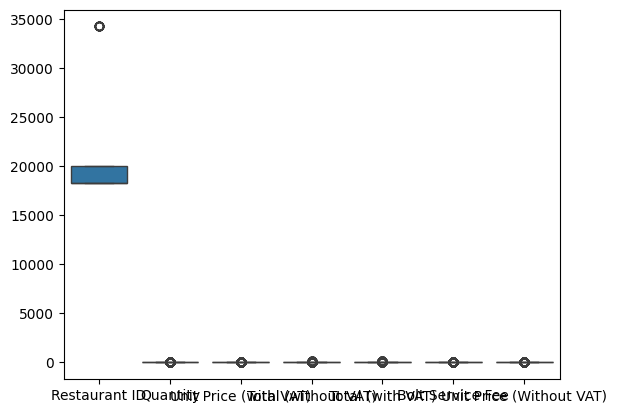